# ETL Pipeline | World Bank Datasets 

In [45]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Extract

> ## Extract Data from SQL Databases

### Pandas and sqlite3

You can use Pandas to open a SQL database or to run a SQL query against a database. There is more than one way to do this depending on the type of SQL database you are working with: the [sqlite3 library](https://www.sqlite.org/about.html) or the [sqlalchemy library](https://www.sqlalchemy.org/).


In [72]:
import sqlite3

#connection to the database 
conn = sqlite3.connect('worldbank.db')

# Cursor object
cursor = conn.cursor()

# SQL query to get all students data
rural_population = """SELECT * FROM rural_population;"""

# executing the SQL query
cursor.execute(rural_population)

# storing the data in a variable using fetchall() method
df_p = cursor.fetchall() # a list of tuples


>  ##  Extracting data from a csv file

There are two csv files:
* rural_population_percent.csv
* electricity_access_percent.csv

They both come from the World Bank Indicators data. 
* https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS
* https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS

The rural populaton data represents the percent of a country's population that is rural over time. The electricity access data shows the percentage of people with access to electricity.

In [65]:
df_rural = pd.read_csv("rural_population.csv")
df_rural.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224000,49.239000,49.254000,49.270000,49.285000,49.300000,49.315000,49.33000,49.346000,49.361000,49.376000,49.391000,49.407000,49.422000,49.437000,49.452000,49.468000,49.483000,49.498000,49.513000,49.528000,49.544000,49.559000,49.574000,49.589000,49.605000,49.620000,49.635000,49.650000,49.665000,49.681000,49.696000,50.002000,50.412000,50.823000,51.233000,51.644000,52.054000,52.464000,52.873000,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,55.948000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.436190,85.188590,84.930751,84.652024,84.359805,84.058718,83.744823,83.42569,83.100392,82.765482,82.448033,82.124679,81.779465,81.437658,81.121101,80.798795,80.475875,80.139562,79.784904,79.444978,79.123888,78.834310,78.554894,78.212893,77.807464,77.354895,76.851872,76.340351,75.826451,75.317150,74.797201,74.354854,73.926126,73.490177,73.051291,72.664712,72.375103,72.088928,71.796625,71.510132,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301,62.175407
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599000,91.316000,91.024000,90.724000,90.414000,90.096000,89.767000,89.43000,89.082000,88.725000,88.357000,87.979000,87.590000,87.191000,86.781000,86.359000,85.926000,85.483000,85.027000,84.558000,84.005000,83.438000,82.853000,82.253000,81.635000,81.003000,80.353000,79.686000,79.002000,78.912000,78.823000,78.734000,78.645000,78.556000,78.466000,78.376000,78.286000,78.195000,78.105000,78.014000,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000,73.384000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,85.294609,84.909877,84.515924,84.102408,83.670792,83.221350,82.792044,82.34752,81.889048,81.417995,80.947281,80.406622,79.850246,79.283679,78.705057,78.116876,77.512337,76.946017,76.379225,75.899668,75.414906,74.807422,74.202193,73.591568,72.950709,72.268877,71.595008,70.929359,70.274530,69.634544,69.029459,68.589670,68.162509,67.740874,67.333730,66.932717,66.525926,66.072194,65.606707,65.136482,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194,50.952615
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565000,89.202000,88.796000,88.376000,87.942000,87.496000,87.035000,86.55900,86.068000,85.564000,85.043000,84.368000,83.545000,82.690000,81.798000,80.872000,79.908000,78.912000,77.878000,76.808000,75.702000,74.563000,73.388000,72.179000,70.935000,69.662000,68.357000,67.022000,65.657000,64.269000,62.856000,61.420000,59.961000,58.489000,57.000000,55.831000,54.654000,53.475000,52.290000,51.103000,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000,31.919000


In [4]:
df_electricity = pd.read_csv("electricity_access.csv")
df_electricity.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,91.660398,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.356292,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.957302,19.975365,21.576500,22.529265,23.749531,23.493013,25.191221,26.807937,25.943316,26.193895,27.400110,28.914348,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.446891,9.294527,14.133616,18.971165,23.814182,28.669672,33.544418,38.440002,42.400000,48.279007,42.700000,43.222019,69.100000,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.575130,32.609692,33.605668,32.629322,32.461797,33.45863,34.810428,34.137971,35.232691,35.722926,39.824589,37.493058,37.792163,39.818819,40.764345,41.741152,41.871043,41.839309,45.911036,44.053700,47.051990,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.238865,20.000000,26.320255,27.355137,28.395485,29.448309,30.520388,37.500000,38.490000,33.846977,34.980053,34.600000,37.259491,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854,NaN


# Transform

> ## Combining Data

I will combine these two data sets together into one pandas data frame.

Combine the two data sets using the [pandas concat method](https://pandas.pydata.org/pandas-docs/stable/merging.html). In other words, find the union of the two data sets.

In [5]:
df = pd.concat([df_rural, df_electricity])
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224000,49.239000,49.254000,49.270000,49.285000,49.300000,49.315000,49.33000,49.346000,49.361000,49.376000,49.391000,49.407000,49.422000,49.437000,49.452000,49.468000,49.483000,49.498000,49.513000,49.528000,49.544000,49.559000,49.574000,49.589000,49.605000,49.620000,49.635000,49.650000,49.665000,49.681000,49.696000,50.002000,50.412000,50.823000,51.233000,51.644000,52.054000,52.464000,52.873000,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,55.948000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,85.436190,85.188590,84.930751,84.652024,84.359805,84.058718,83.744823,83.42569,83.100392,82.765482,82.448033,82.124679,81.779465,81.437658,81.121101,80.798795,80.475875,80.139562,79.784904,79.444978,79.123888,78.834310,78.554894,78.212893,77.807464,77.354895,76.851872,76.340351,75.826451,75.317150,74.797201,74.354854,73.926126,73.490177,73.051291,72.664712,72.375103,72.088928,71.796625,71.510132,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301,62.175407
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599000,91.316000,91.024000,90.724000,90.414000,90.096000,89.767000,89.43000,89.082000,88.725000,88.357000,87.979000,87.590000,87.191000,86.781000,86.359000,85.926000,85.483000,85.027000,84.558000,84.005000,83.438000,82.853000,82.253000,81.635000,81.003000,80.353000,79.686000,79.002000,78.912000,78.823000,78.734000,78.645000,78.556000,78.466000,78.376000,78.286000,78.195000,78.105000,78.014000,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000,73.384000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,85.294609,84.909877,84.515924,84.102408,83.670792,83.221350,82.792044,82.34752,81.889048,81.417995,80.947281,80.406622,79.850246,79.283679,78.705057,78.116876,77.512337,76.946017,76.379225,75.899668,75.414906,74.807422,74.202193,73.591568,72.950709,72.268877,71.595008,70.929359,70.274530,69.634544,69.029459,68.589670,68.162509,67.740874,67.333730,66.932717,66.525926,66.072194,65.606707,65.136482,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194,50.952615
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565000,89.202000,88.796000,88.376000,87.942000,87.496000,87.035000,86.55900,86.068000,85.564000,85.043000,84.368000,83.545000,82.690000,81.798000,80.872000,79.908000,78.912000,77.878000,76.808000,75.702000,74.563000,73.388000,72.179000,70.935000,69.662000,68.357000,67.022000,65.657000,64.269000,62.856000,61.420000,59.961000,58.489000,57.000000,55.831000,54.654000,53.475000,52.290000,51.103000,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000,31.919000


In [6]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [7]:
df["Indicator Name"].unique()

array(['Rural population (% of total population)',
       'Access to electricity (% of population)'], dtype=object)

> ## Null Value Treatment

Every data set might have its own issues whether that involves missing values, duplicated entries, data entry mistakes, etc. In this notebook, I'll do some data cleaning on the World Bank projects and World Bank electricity data sets.

In [8]:
# finding missimg values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Country Name,Country Name,0.000000
Country Code,Country Code,0.000000
Indicator Name,Indicator Name,0.000000
Indicator Code,Indicator Code,0.000000
1960,1960,50.563910
1961,1961,50.563910
1962,1962,50.563910
1963,1963,50.563910
1964,1964,50.563910
1965,1965,50.563910


In [9]:
# missing values more than 50% 
missing_value_df[missing_value_df['percent_missing']>50]

,column_name,percent_missing
1960,1960,50.56391
1961,1961,50.56391
1962,1962,50.56391
1963,1963,50.56391
1964,1964,50.56391
1965,1965,50.56391
1966,1966,50.56391
1967,1967,50.56391
1968,1968,50.56391
1969,1969,50.56391


As more than 50% of Null Values are observed between 1960 and 1999, we discard those data and focus on data from 2000 to 2021 for our analysis. 

In [10]:
df = df.drop(df.loc[:,"1960":"1999"],axis = 1)
df = df.drop(df.loc[:,"2022":],axis = 1)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000


In [11]:
df.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              10
2001              10
2002               9
2003               9
2004               9
2005               9
2006               9
2007               7
2008               7
2009               6
2010               6
2011               6
2012               6
2013               6
2014               6
2015               6
2016               6
2017               6
2018               6
2019               6
2020               6
2021               6
dtype: int64

In [ ]:
# Null Value Imputation

In [25]:
num_col = df.select_dtypes(exclude="object").columns
df[num_col] = df[num_col].fillna(df[num_col].mean())
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000
1,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301
2,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000
3,Africa Western and Central,AFW,Rural population (% of total population),SP.RUR.TOTL.ZS,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194
4,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000


In [27]:
# Null Values are treated
df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
dtype: int64

>## Data Types

When reading in a data set, pandas will try to guess the data type of each column like float, integer, datettime, bool, etc. In Pandas, strings are called "object" dtypes. 

With messy data, you might find it easier to read in everything as a string; however, you'll sometimes have to convert those strings to more appropriate data types. When you output the dtypes of a dataframe, you'll generally see these values in the results:
* float64
* int64
* bool
* datetime64
* timedelta
* object

where timedelta is the difference between two datetimes and object is a string. As you've seen here, you sometimes need to convert data types from one type to another type. Pandas has a few different methods for converting between data types, and here are link to the documentation:

* [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 265
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    532 non-null    object 
 1   Country Code    532 non-null    object 
 2   Indicator Name  532 non-null    object 
 3   Indicator Code  532 non-null    object 
 4   2000            522 non-null    float64
 5   2001            522 non-null    float64
 6   2002            523 non-null    float64
 7   2003            523 non-null    float64
 8   2004            523 non-null    float64
 9   2005            523 non-null    float64
 10  2006            523 non-null    float64
 11  2007            525 non-null    float64
 12  2008            525 non-null    float64
 13  2009            526 non-null    float64
 14  2010            526 non-null    float64
 15  2011            526 non-null    float64
 16  2012            526 non-null    float64
 17  2013            526 non-null    flo

In [13]:
# all the variable's datatypes are as expected 


> ## Encodings

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings). Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet. 

The English alphabet has only 26 letters. But other languages have many more characters including accents, tildes and umlauts. As time went on, more encodings were invented to deal with languages other than English.

In [29]:
df['Indicator Name'].unique()

array(['Rural population (% of total population)',
       'Access to electricity (% of population)'], dtype=object)

In [32]:
df['Indicator Code'].unique()

array(['SP.RUR.TOTL.ZS', 'EG.ELC.ACCS.ZS'], dtype=object)

As the same values are repeated in both the inidcator name and indicator code, dropping indicator name column 

In [43]:
df.drop(columns="Indicator Name", axis = 1, inplace = True)

### Label Encoding

In [46]:
le=LabelEncoder()
df['Indicator Code'] = le.fit_transform(df['Indicator Code'])

* Rural population (% of total population) ==> 1
* Access to electricity (% of population)  ==> 0

In [48]:
df['Indicator Code'].unique()

array([1, 0])

In [53]:
df['Indicator Code'] = df['Indicator Code'].astype("str")

In [54]:
df.head()

,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,1,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000
1,Africa Eastern and Southern,AFE,1,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301
2,Afghanistan,AFG,1,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000
3,Africa Western and Central,AFW,1,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194
4,Angola,AGO,1,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000


>## Scaling Data

Sometimes, we'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.

In [55]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,60.107730,60.216199,60.201949,60.376783,60.435818,60.508376,60.816561,60.633358,60.796953,60.735729,61.001700,61.233160,61.422984,61.570797,61.763941,61.888940,62.286141,62.497782,62.654757,62.770426,62.873511,62.989232
std,31.466176,31.500306,31.525864,31.414750,31.393633,31.435775,31.489116,31.587447,31.708162,31.831039,31.925509,31.856334,31.879544,32.019291,32.084653,32.131677,32.188829,32.307298,32.290320,32.481434,32.616069,32.719524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.974250,33.015000,33.159171,33.215154,33.417721,33.404250,33.504564,33.581715,33.807500,33.261836,33.634500,34.680781,35.223000,34.599663,34.277496,34.775286,35.898250,35.333173,37.373000,36.784000,36.437750,36.049750
50%,62.570168,62.330859,61.558544,62.044984,61.911000,61.704258,61.297193,61.466000,61.259000,61.222500,61.496551,61.984280,61.438492,61.586399,61.905466,61.888940,62.286141,62.648891,62.654757,62.931713,62.873511,62.989232
75%,91.738767,92.571382,92.562115,92.840116,93.253360,93.547268,95.843158,94.529331,95.223822,96.191367,96.493237,96.674831,96.842047,97.629741,97.940532,98.163294,98.870287,99.200000,99.386572,99.525000,99.719519,99.917863
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


There is no scaling needed for the data , as the numerical columns are spreaded in the same way across all the columns.

>## Outliers

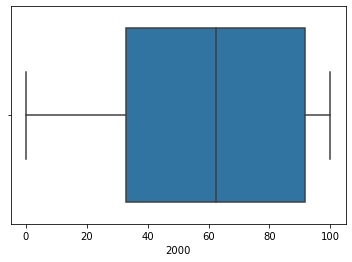

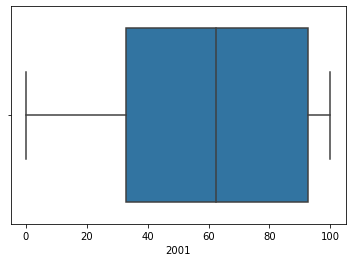

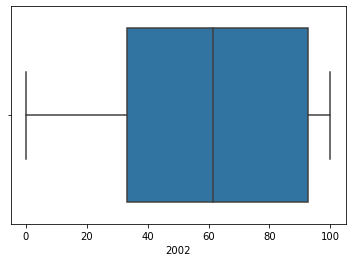

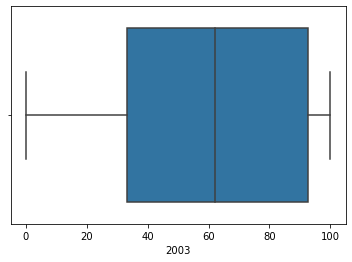

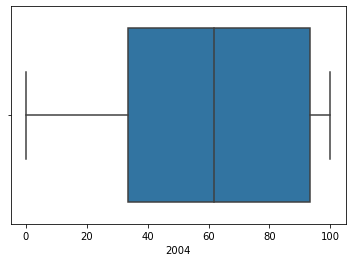

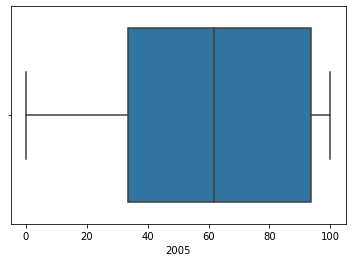

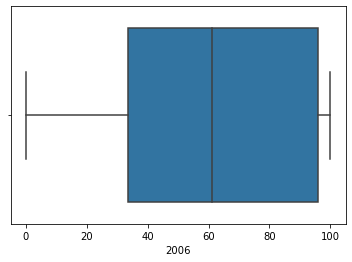

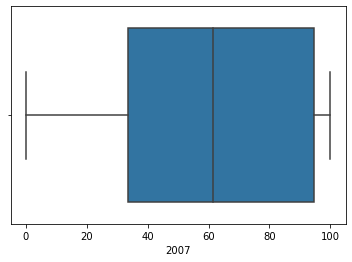

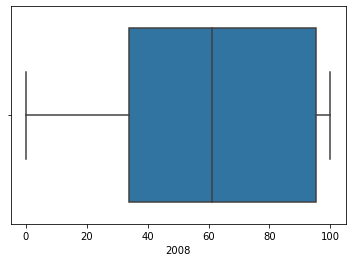

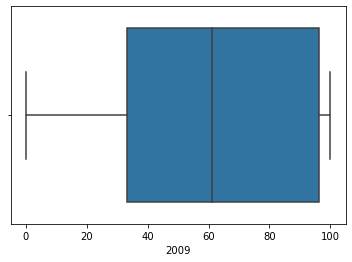

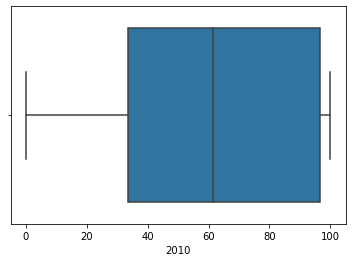

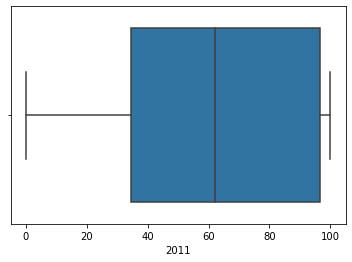

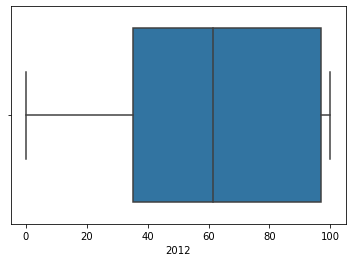

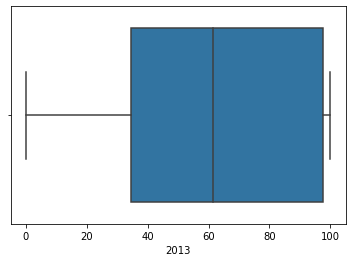

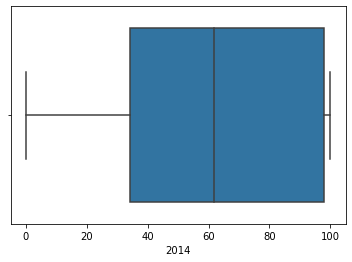

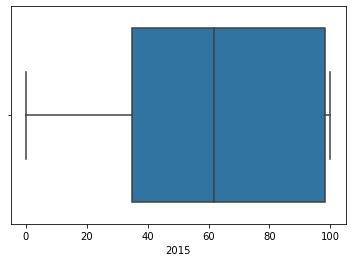

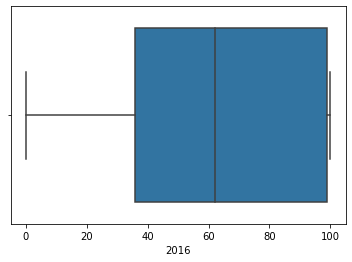

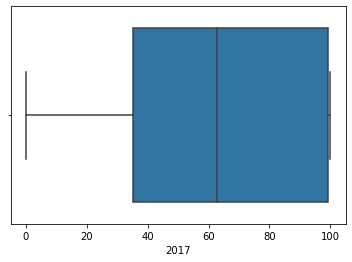

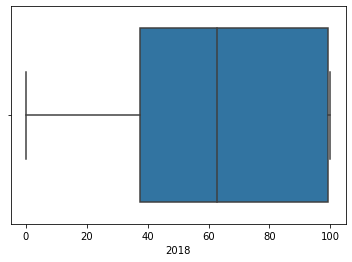

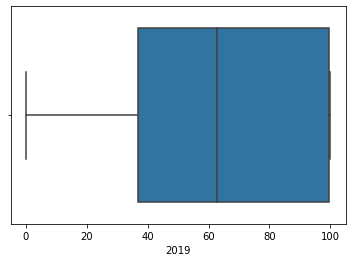

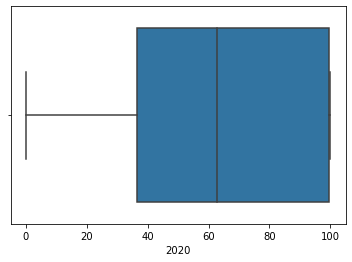

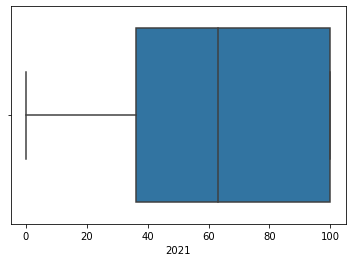

In [58]:
for i in num_col:
    sb.boxplot(df[i])
    plt.show()

The analysis of the Box Plot reveals that there are no outliers.

# Load 

In this part, I'll load data into different formats: a csv file and a SQLite database.

In [ ]:
# into SQL DataBase

In [60]:
import sqlite3
conn = sqlite3.connect('worldbank.db')
df.to_sql('df', con = conn, if_exists='replace', index=False)

In [62]:
pd.read_sql('SELECT * FROM df', con = conn).head()

,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,1,53.283000,53.661000,54.028000,54.394000,54.760000,55.125000,55.489000,55.853000,56.217000,56.579000,56.941000,57.060000,57.043000,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000
1,Africa Eastern and Southern,AFE,1,71.227220,70.928409,70.613810,70.301581,69.985852,69.650131,69.323934,69.065234,68.656759,68.242474,67.818709,67.382308,66.959526,66.523788,66.063037,65.574416,65.105247,64.641099,64.152402,63.663741,63.171698,62.676301
2,Afghanistan,AFG,1,77.922000,77.831000,77.739000,77.647000,77.500000,77.297000,77.093000,76.887000,76.680000,76.472000,76.263000,76.052000,75.840000,75.627000,75.413000,75.197000,74.980000,74.750000,74.505000,74.246000,73.974000,73.686000
3,Africa Western and Central,AFW,1,64.662951,64.055092,63.445119,62.826687,62.201023,61.565516,60.920696,60.278402,59.639465,58.998488,58.352842,57.711701,57.074115,56.445906,55.819825,55.194137,54.574934,53.960522,53.350574,52.744587,52.142169,51.545194
4,Angola,AGO,1,49.913000,48.726000,47.539000,46.355000,45.173000,44.000000,43.236000,42.476000,41.718000,40.966000,40.217000,39.472000,38.732000,37.998000,37.269000,36.554000,35.851000,35.161000,34.486000,33.823000,33.175000,32.540000


In [63]:
conn.commit()
conn.close()

In [64]:
# into csv
df.to_csv('Processed_Data.csv')